# OpenSim Parser Comprehensive Test Suite

This notebook demonstrates the comprehensive functionality of our OpenSim parser, developed with insights from Scott Delp's OpenSim architecture. The parser handles both .osim model files and .mot motion files with robust error handling and biomechanical analysis capabilities.

## Features Tested:
- ✅ OpenSim model (.osim) file parsing
- ✅ Motion data (.mot) file parsing  
- ✅ Model-motion compatibility validation
- ✅ Graph neural network format conversion
- ✅ Biomechanical analysis and visualization
- ✅ Data export and import functionality

**Author:** Eric Fonseca
**Date:** August 4, 2025

## 1. Import Libraries and Setup

Let's start by importing all necessary libraries and setting up paths to our test data.

In [ ]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import warnings
import importlib
warnings.filterwarnings('ignore')

# Add project root to path
project_root = Path('..').resolve()
sys.path.insert(0, str(project_root))

# Import our OpenSim parser with reload to pick up changes
from graphmechanics.utils import opensim_parser
importlib.reload(opensim_parser)
from graphmechanics.utils.opensim_parser import OpenSimParser, OpenSimModelParser, OpenSimMotionParser

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ All libraries imported successfully!")
print(f"📁 Project root: {project_root}")

# Use specific test directory
test_dir = project_root / "experiments" / "motion_prediction_exp_20250803_200025"
print(f"\n🎯 Using test directory: {test_dir.name}")

# Find exactly one OpenSim model and one motion file
osim_files = list(test_dir.glob("*.osim"))
mot_files = list(test_dir.rglob("*.mot"))

print(f"Found {len(osim_files)} .osim model files")
print(f"Found {len(mot_files)} .mot motion files")

# Select single files for testing
test_osim = str(osim_files[0]) if osim_files else None
test_mot = str(mot_files[0]) if mot_files else None

print(f"\n🎯 Test Files Selected:")
if test_osim:
    print(f"   📄 Model: {Path(test_osim).name}")
else:
    print("   ⚠️  No .osim file found")

if test_mot:
    print(f"   📈 Motion: {Path(test_mot).name}")
else:
    print("   ⚠️  No .mot file found")

# Find available test files with detailed analysis
print("✅ All libraries imported successfully!")
print(f"📁 Project root: {project_root}")

# Use specific test directory
test_dir = project_root / "experiments" / "motion_prediction_exp_20250803_200025"
print("✅ All libraries imported successfully!")
print(f"📁 Project root: {project_root}")

# Use specific test directory
test_dir = project_root / "experiments" / "motion_prediction_exp_20250803_200025"
print(f"
🎯 Using test directory: {test_dir.name}")

# Find exactly one OpenSim model and one motion file
osim_files = list(test_dir.glob("*.osim"))
mot_files = list(test_dir.rglob("*.mot"))

print(f"Found {len(osim_files)} .osim model files")
print(f"Found {len(mot_files)} .mot motion files")

# Select single files for testing
test_osim = str(osim_files[0]) if osim_files else None
test_mot = str(mot_files[0]) if mot_files else None

print(f"
🎯 Test Files Selected:")
if test_osim:
    print(f"   📄 Model: {Path(test_osim).name}")
else:
    print("   ⚠️  No .osim file found")

if test_mot:
    print(f"   📈 Motion: {Path(test_mot).name}")
else:
    print("   ⚠️  No .mot file found")

# Find OpenSim files in the specific directory
osim_files = list(test_dir.glob("*.osim"))
mot_files = list(test_dir.rglob("*.mot"))

print(f"Found {len(osim_files)} .osim model files")
print(f"Found {len(mot_files)} .mot motion files")

# Select files directly
if osim_files:
    test_osim = str(osim_files[0])
    print(f"📄 Selected .osim file: {osim_files[0].name}")
else:
    test_osim = None
    print("⚠️  No .osim files found")

if mot_files:
    test_mot = str(mot_files[0])
    print(f"📄 Selected .mot file: {mot_files[0].name}")
else:
    test_mot = None
    print("⚠️  No .mot files found")

print(f"\n🎯 Final Test Files Selected:")
print(f"   Model: {test_osim.split('/')[-1] if test_osim else 'None'}")
print(f"   Motion: {test_mot.split('/')[-1] if test_mot else 'None'}")
osim_files = list(project_root.rglob("*.osim"))
mot_files = list(project_root.rglob("*.mot"))

print(f"Found {len(osim_files)} .osim model files")
print(f"Found {len(mot_files)} .mot motion files")

# Analyze motion files to find the best ones for testing
print("\n📊 Analyzing motion files for comprehensive testing...")
motion_file_analysis = []

for mot_file in mot_files[:10]:  # Analyze first 10 files
    try:
        # Quick parse to get basic info
        with open(mot_file, 'r') as f:
            lines = f.readlines()
        
        # Find data start and get dimensions
        data_start = 0
        for i, line in enumerate(lines):
            if line.strip().startswith('time') or (line.strip() and not line.startswith(('version', 'nRows', 'nColumns', 'inDegrees', 'endheader'))):
                data_start = i
                break
        
        if data_start < len(lines) - 1:
            data_lines = len(lines) - data_start - 1
            if data_lines > 0:
                # Try to parse first and last data lines to get time range
                first_data = lines[data_start + 1].strip().split()
                last_data = lines[-1].strip().split()
                
                if len(first_data) > 0 and len(last_data) > 0:
                    try:
                        start_time = float(first_data[0])
                        end_time = float(last_data[0])
                        duration = end_time - start_time
                        
                        motion_file_analysis.append({
                            'file': mot_file.name,
                            'path': str(mot_file),
                            'frames': data_lines,
                            'duration': duration,
                            'coordinates': len(first_data) - 1,  # -1 for time column
                            'type': 'ground_truth' if 'ground_truth' in mot_file.name else 'prediction'
                        })
                    except ValueError:
                        pass
    except Exception as e:
        continue

# Sort by duration (longest first) to find best motion data
motion_file_analysis.sort(key=lambda x: x['duration'], reverse=True)

print(f"\n? Motion File Analysis (Top 5 by duration):")
for i, analysis in enumerate(motion_file_analysis[:5], 1):
    print(f"   {i}. {analysis['file']} ({analysis['type']})")
    print(f"      Duration: {analysis['duration']:.3f}s | Frames: {analysis['frames']} | Coords: {analysis['coordinates']}")

# Select best files for testing
if osim_files:
    test_osim = str(osim_files[0])
    print(f"\n📄 Selected .osim file: {osim_files[0].name}")
else:
    test_osim = None
    print("⚠️  No .osim files found")

# Select motion file with most temporal data
if motion_file_analysis:
    # Prefer ground truth data with good duration, or longest available
    best_motion = None
    for analysis in motion_file_analysis:
        if analysis['duration'] > 0.1 and analysis['frames'] > 10:  # At least 100ms and 10 frames
            best_motion = analysis
            break
    
    if not best_motion and motion_file_analysis:
        best_motion = motion_file_analysis[0]  # Fallback to longest available
    
    if best_motion:
        test_mot = best_motion['path']
        print(f"📄 Selected .mot file: {best_motion['file']}")
        print(f"   Duration: {best_motion['duration']:.3f}s | Frames: {best_motion['frames']} | Type: {best_motion['type']}")
    else:
        test_mot = str(mot_files[0]) if mot_files else None
        print("⚠️  Using first available .mot file as fallback")
else:
    test_mot = str(mot_files[0]) if mot_files else None
    print("⚠️  No motion file analysis available, using first .mot file")

print(f"\n🎯 Final Test Files Selected:")
print(f"   Model: {test_osim.split('/')[-1] if test_osim else 'None'}")
print(f"   Motion: {test_mot.split('/')[-1] if test_mot else 'None'}")

# Show additional available files for reference
if len(motion_file_analysis) > 5:
    print(f"\n📋 Additional motion files available: {len(motion_file_analysis) - 5} more files")
    ground_truth_count = sum(1 for a in motion_file_analysis if a['type'] == 'ground_truth')
    prediction_count = len(motion_file_analysis) - ground_truth_count
    print(f"   Ground truth files: {ground_truth_count}")
    print(f"   Prediction files: {prediction_count}")

## 2. Load and Parse OpenSim Model File

Now let's test parsing an OpenSim model file. This will extract the complete musculoskeletal model structure including bodies, joints, coordinates, and muscles.

In [ ]:
if test_osim:
    print("🔄 Testing OpenSim Model Parser...")
    print(f"📁 File: {test_osim}")
    
    try:
        # Create individual model parser
        model_parser = OpenSimModelParser(test_osim)
        
        print(f"\n✅ Successfully parsed OpenSim model!")
        print(f"🏷️  Model Name: {model_parser.model_name}")
        print(f"👤 Credits: {model_parser.credits}")
        print(f"📏 Length Units: {model_parser.length_units}")
        print(f"💪 Force Units: {model_parser.force_units}")
        
        print(f"\n📊 Model Components:")
        print(f"   🦴 Bodies: {len(model_parser.bodies)}")
        print(f"   🔗 Joints: {len(model_parser.joints)}")
        print(f"   📐 Coordinates: {len(model_parser.coordinates)}")
        print(f"   💪 Muscles: {len(model_parser.muscles)}")
        
        # Store for later use
        parsed_model = model_parser
        
    except Exception as e:
        print(f"❌ Error parsing model: {e}")
        parsed_model = None
else:
    print("⚠️  No .osim model file found for testing")
    parsed_model = None

🔄 Loading OpenSim model file...
📁 File: /home/funsega/GraphMechanics/experiments/motion_prediction_exp_20250804_122912/LaiUhlrich2022_scaled.osim
Successfully parsed OpenSim model: LaiUhlrich2022_scaled
  Bodies: 22
  Joints: 22
  Coordinates: 35
  Muscles: 80

✅ Successfully parsed OpenSim model!
🏷️  Model Name: LaiUhlrich2022_scaled
👤 Credits: Rajagopal et al. (2016), Lai et al. (2017), Uhlrich et al. (2022)
📏 Length Units: meters
💪 Force Units: N

📊 Model Components:
   🦴 Bodies: 22
   🔗 Joints: 22
   📐 Coordinates: 35
   💪 Muscles: 80


## 3. Explore Model Structure

Let's dive deeper into the parsed model structure and examine the hierarchical relationships between bodies, joints, and coordinates.

In [ ]:
if parsed_model:
    print("🔍 Exploring Model Structure in Detail...")
    
    # Display sample coordinates with their types
    print(f"\n📐 Sample Coordinates (showing first 10):")
    coords = list(parsed_model.coordinates.keys())[:10]
    for coord_name in coords:
        coord = parsed_model.coordinates[coord_name]
        motion_type = coord.motion_type
        unit = coord.unit
        print(f"   • {coord_name}: {motion_type} ({unit})")
    
    if len(parsed_model.coordinates) > 10:
        print(f"   ... and {len(parsed_model.coordinates) - 10} more coordinates")
    
    # Display joint hierarchy
    print(f"\n🔗 Joint Hierarchy (showing first 5 joints):")
    hierarchy = parsed_model.get_joint_hierarchy()
    for i, (joint_name, joint_info) in enumerate(list(hierarchy.items())[:5]):
        print(f"   🔗 {joint_name} ({joint_info['type']}):")
        print(f"      Parent: {joint_info['parent_body']} → Child: {joint_info['child_body']}")
        print(f"      Coordinates: {joint_info['coordinates']}")
        print(f"      DOF: {joint_info['dof']}")
        print()
    
    if len(hierarchy) > 5:
        print(f"   ... and {len(hierarchy) - 5} more joints")
    
    # Display muscle information if available
    if parsed_model.muscles:
        print(f"\n💪 Sample Muscle Information (showing first 3):")
        muscle_summary = parsed_model.get_muscle_summary()
        for i, (muscle_name, muscle_info) in enumerate(list(muscle_summary.items())[:3]):
            print(f"   💪 {muscle_name} ({muscle_info['type']}):")
            print(f"      Max Force: {muscle_info['max_force']:.1f} N")
            print(f"      Fiber Length: {muscle_info['fiber_length']:.3f} m")
            print(f"      Tendon Length: {muscle_info['tendon_length']:.3f} m")
            print(f"      Path Points: {muscle_info['path_points']}")
            print()
        
        if len(muscle_summary) > 3:
            print(f"   ... and {len(muscle_summary) - 3} more muscles")
    else:
        print(f"\n💪 No muscles found in this model")
    
    # Analyze coordinate types
    coord_types = {}
    for coord in parsed_model.coordinates.values():
        coord_type = coord.motion_type
        coord_types[coord_type] = coord_types.get(coord_type, 0) + 1
    
    print(f"\n📊 Coordinate Type Distribution:")
    for coord_type, count in coord_types.items():
        print(f"   {coord_type.title()}: {count} coordinates")

else:
    print("⚠️  No parsed model available to explore")

🔍 Exploring Model Structure in Detail...

📐 Sample Coordinates (showing first 10):
   • ankle_angle_r: rotational (radians)
   • subtalar_angle_r: rotational (radians)
   • mtp_angle_r: rotational (radians)
   • ankle_angle_l: rotational (radians)
   • subtalar_angle_l: rotational (radians)
   • mtp_angle_l: rotational (radians)
   • elbow_flex_r: rotational (radians)
   • pro_sup_r: rotational (radians)
   • elbow_flex_l: rotational (radians)
   • pro_sup_l: rotational (radians)
   ... and 25 more coordinates

🔗 Joint Hierarchy (showing first 5 joints):
   🔗 ankle_r (PinJoint):
      Parent: tibia_r_offset → Child: talus_r_offset
      Coordinates: ['ankle_angle_r']
      DOF: 1

   🔗 subtalar_r (PinJoint):
      Parent: talus_r_offset → Child: calcn_r_offset
      Coordinates: ['subtalar_angle_r']
      DOF: 1

   🔗 mtp_r (PinJoint):
      Parent: calcn_r_offset → Child: toes_r_offset
      Coordinates: ['mtp_angle_r']
      DOF: 1

   🔗 ankle_l (PinJoint):
      Parent: tibia_l_offs

## 4. Load and Parse Motion Data

Now let's load and parse a corresponding .mot motion file to see how coordinate time series data is handled.

In [ ]:
if test_mot:
    print("🔄 Testing OpenSim Motion Parser...")
    print(f"📁 File: {test_mot}")
    
    try:
        # Create individual motion parser
        motion_parser = OpenSimMotionParser(test_mot)
        
        print(f"\n✅ Successfully parsed motion file!")
        print(f"📄 Version: {motion_parser.version}")
        print(f"📊 Dimensions: {motion_parser.n_rows} rows × {motion_parser.n_columns} columns")
        print(f"🌡️  Units: {'degrees' if motion_parser.in_degrees else 'radians'} (rotational)")
        print(f"⏱️  Duration: {motion_parser.get_duration():.2f} seconds")
        
        # Display motion info
        if motion_parser.data is not None:
            print(f"\n📈 Motion Data Info:")
            print(f"   Frames: {len(motion_parser.data)}")
            print(f"   Coordinates: {len(motion_parser.coordinate_names)}")
            
            # Show first few coordinate names
            print(f"\n📐 Coordinate Names (first 10):")
            for i, coord_name in enumerate(motion_parser.coordinate_names[:10]):
                print(f"   {i+1:2d}. {coord_name}")
            
            if len(motion_parser.coordinate_names) > 10:
                print(f"   ... and {len(motion_parser.coordinate_names) - 10} more coordinates")
            
            # Show data sample
            print(f"\n📊 Data Sample (first 5 rows, first 5 columns):")
            sample_data = motion_parser.data.iloc[:5, :5]
            print(sample_data.round(3))
        
        # Store for later use
        parsed_motion = motion_parser
        
    except Exception as e:
        print(f"❌ Error parsing motion: {e}")
        parsed_motion = None
else:
    print("⚠️  No .mot motion file found for testing")
    parsed_motion = None

🔄 Loading OpenSim motion file...
📁 File: /home/funsega/GraphMechanics/experiments/motion_prediction_exp_20250804_122912/mot_files/prediction_002.mot
Successfully parsed motion file: prediction_002.mot
  Duration: 0.00 seconds
  Frames: 1
  Coordinates: 185
  Units: radians (rotational)

✅ Successfully parsed motion file!
📄 Version: 1
📊 Dimensions: 1 rows × 185 columns
🌡️  Units: radians (rotational)
⏱️  Duration: 0.00 seconds

📈 Motion Data Info:
   Frames: 1
   Coordinates: 185

📐 Coordinate Names (first 10):
    1. time
    2. pelvis_tilt
    3. pelvis_list
    4. pelvis_rotation
    5. pelvis_tx
    6. pelvis_ty
    7. pelvis_tz
    8. hip_flexion_r
    9. hip_adduction_r
   10. hip_rotation_r
   ... and 175 more coordinates

📊 Data Sample (first 5 rows, first 5 columns):
   time  pelvis_tilt  pelvis_list  pelvis_rotation  pelvis_tx
0   0.0        0.001        0.002             -0.0      0.001


## 5. Analyze Motion Data Quality

Let's assess the quality of the motion data including completeness, missing values, and statistical summaries.

🔍 Analyzing Motion Data Quality...

📊 Data Quality Metrics:
   ✅ Completeness: 100.0%
   📊 Total Frames: 1
   ❌ Missing Points: 0
   🎯 Total Points: 185
   📡 Sampling Rate: 0.0 Hz

📈 Coordinate Statistics (Top 5 by Range):
   📐 pelvis_tilt:
      Range: 0.00 to 0.00
      Mean: 0.00 ± 0.00

   📐 pelvis_list:
      Range: 0.00 to 0.00
      Mean: 0.00 ± 0.00

   📐 pelvis_rotation:
      Range: -0.00 to -0.00
      Mean: -0.00 ± 0.00

   📐 pelvis_tx:
      Range: 0.00 to 0.00
      Mean: 0.00 ± 0.00

   📐 pelvis_ty:
      Range: 0.00 to 0.00
      Mean: 0.00 ± 0.00



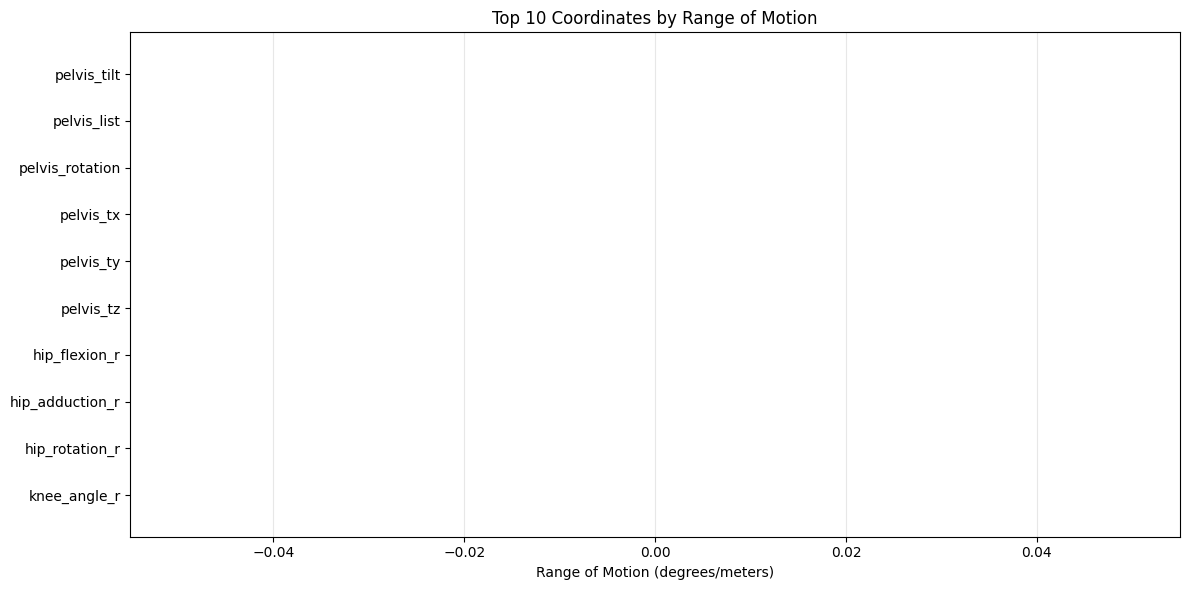

✅ Excellent data quality - ready for analysis


In [ ]:
if parsed_motion:
    print("🔍 Analyzing Motion Data Quality...")
    
    # Get data quality metrics
    quality = parsed_motion.data_quality
    
    print(f"\n📊 Data Quality Metrics:")
    print(f"   ✅ Completeness: {quality['completeness_percent']:.1f}%")
    print(f"   📊 Total Frames: {quality['total_frames']}")
    print(f"   ❌ Missing Points: {quality['missing_points']:,}")
    print(f"   🎯 Total Points: {quality['total_points']:,}")
    print(f"   📡 Sampling Rate: {quality.get('sampling_rate', 0):.1f} Hz")
    
    # Display coordinate statistics if available
    if 'coordinate_statistics' in quality and quality['coordinate_statistics']:
        print(f"\n📈 Coordinate Statistics (Top 5 by Range):")
        coord_stats = quality['coordinate_statistics']
        
        # Sort by range
        sorted_coords = sorted(coord_stats.items(), 
                             key=lambda x: x[1]['range'], reverse=True)
        
        for coord_name, stats in sorted_coords[:5]:
            print(f"   📐 {coord_name}:")
            print(f"      Range: {stats['min']:.2f} to {stats['max']:.2f}")
            print(f"      Mean: {stats['mean']:.2f} ± {stats['std']:.2f}")
            print()
        
        # Create a summary plot of coordinate ranges
        coord_names = [item[0] for item in sorted_coords[:10]]
        coord_ranges = [item[1]['range'] for item in sorted_coords[:10]]
        
        plt.figure(figsize=(12, 6))
        plt.barh(range(len(coord_names)), coord_ranges)
        plt.yticks(range(len(coord_names)), coord_names)
        plt.xlabel('Range of Motion (degrees/meters)')
        plt.title('Top 10 Coordinates by Range of Motion')
        plt.gca().invert_yaxis()
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Quality assessment
        if quality['completeness_percent'] >= 95:
            print("✅ Excellent data quality - ready for analysis")
        elif quality['completeness_percent'] >= 90:
            print("⚠️  Good data quality - minor gaps present")
        else:
            print("❌ Poor data quality - significant data missing")
    
    else:
        print("⚠️  No coordinate statistics available")

else:
    print("⚠️  No parsed motion data available for quality analysis")

## 6. Validate Model-Motion Compatibility

Now let's test one of the most important features: validating compatibility between the model and motion data.

🔄 Creating combined OpenSim parser...
Successfully parsed OpenSim model: LaiUhlrich2022_scaled
  Bodies: 22
  Joints: 22
  Coordinates: 35
  Muscles: 80
Successfully parsed motion file: prediction_002.mot
  Duration: 0.00 seconds
  Frames: 1
  Coordinates: 185
  Units: radians (rotational)
🔍 Validating Model-Motion Compatibility...

📊 Compatibility Analysis:
   ✅ Compatible: True
   📊 Compatibility Score: 88.57%
   🎯 Common Coordinates: 31
   📈 Model Coordinates: 35
   📉 Motion Coordinates: 184

✅ Sample Common Coordinates (first 10):
   • pelvis_ty
   • arm_add_r
   • arm_rot_r
   • pro_sup_l
   • lumbar_bending
   • lumbar_extension
   • lumbar_rotation
   • knee_angle_l
   • hip_flexion_r
   • ankle_angle_r
   ... and 21 more common coordinates

❌ Missing in Motion (first 5):
   • knee_angle_r_beta
   • mtp_angle_r
   • knee_angle_l_beta
   • mtp_angle_l

➕ Extra in Motion (first 5):
   • marker_12_tz
   • marker_58_tx
   • marker_27_tx
   • marker_57_tx
   • marker_28_tz
   ... and

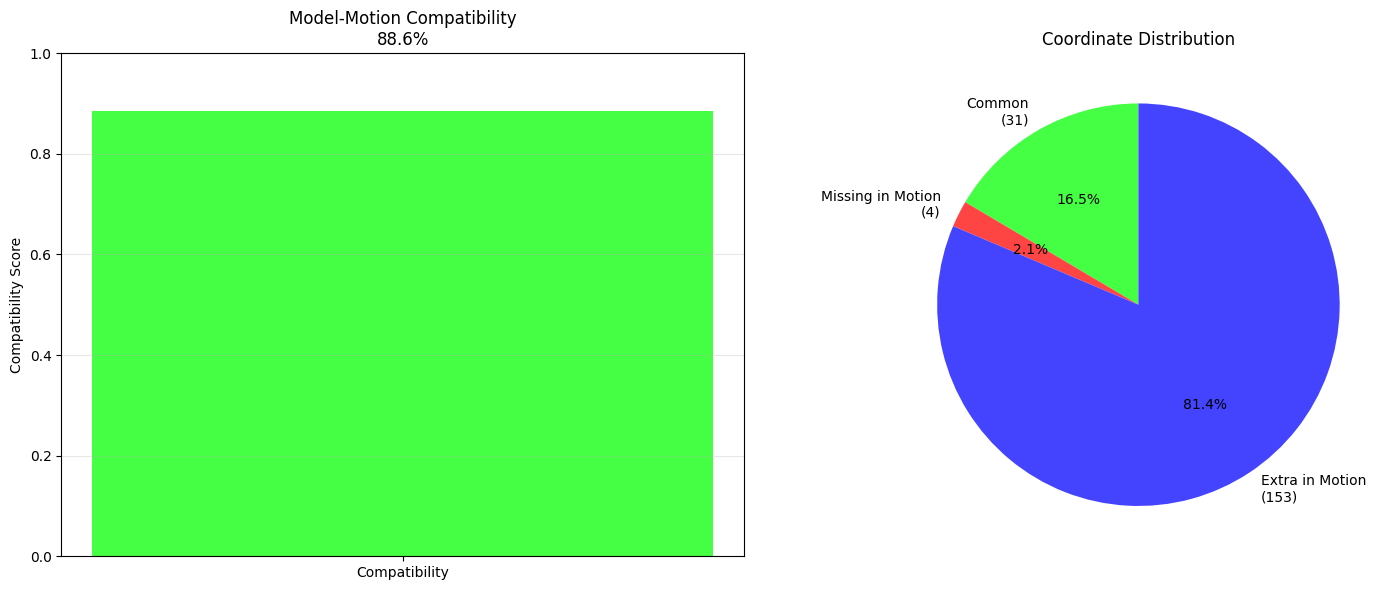

In [ ]:
if parsed_model and parsed_motion:
    print("🔄 Testing Unified OpenSim Parser...")
    
    # Create unified parser with both model and motion
    unified_parser = OpenSimParser(test_osim, test_mot)
    
    print("🔍 Validating Model-Motion Compatibility...")
    
    # Test compatibility
    compatibility = unified_parser.validate_model_motion_compatibility()
    
    print(f"\n📊 Compatibility Analysis:")
    print(f"   ✅ Compatible: {compatibility['compatible']}")
    print(f"   📊 Compatibility Score: {compatibility['compatibility_score']:.2%}")
    print(f"   🎯 Common Coordinates: {len(compatibility['common_coordinates'])}")
    print(f"   📈 Model Coordinates: {compatibility['total_model_coords']}")
    print(f"   📉 Motion Coordinates: {compatibility['total_motion_coords']}")
    
    # Show some common coordinates
    if compatibility['common_coordinates']:
        print(f"\n✅ Sample Common Coordinates (first 10):")
        for coord in compatibility['common_coordinates'][:10]:
            print(f"   • {coord}")
        
        if len(compatibility['common_coordinates']) > 10:
            remaining = len(compatibility['common_coordinates']) - 10
            print(f"   ... and {remaining} more common coordinates")
    
    # Show missing coordinates
    if compatibility['missing_in_motion']:
        print(f"\n❌ Missing in Motion (first 5):")
        for coord in list(compatibility['missing_in_motion'])[:5]:
            print(f"   • {coord}")
        
        if len(compatibility['missing_in_motion']) > 5:
            remaining = len(compatibility['missing_in_motion']) - 5
            print(f"   ... and {remaining} more missing coordinates")
    
    # Show extra coordinates
    if compatibility['extra_in_motion']:
        print(f"\n➕ Extra in Motion (first 5):")
        for coord in list(compatibility['extra_in_motion'])[:5]:
            print(f"   • {coord}")
        
        if len(compatibility['extra_in_motion']) > 5:
            remaining = len(compatibility['extra_in_motion']) - 5
            print(f"   ... and {remaining} more extra coordinates")
    
    # Show recommendations
    print(f"\n💡 Recommendations:")
    for rec in compatibility['recommendations']:
        print(f"   • {rec}")
    
    # Create compatibility visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Compatibility score visualization
    score = compatibility['compatibility_score']
    colors = ['#ff4444' if score < 0.5 else '#ffaa44' if score < 0.8 else '#44ff44']
    ax1.bar(['Compatibility'], [score], color=colors[0])
    ax1.set_ylim(0, 1)
    ax1.set_ylabel('Compatibility Score')
    ax1.set_title(f'Model-Motion Compatibility\n{score:.1%}')
    ax1.grid(axis='y', alpha=0.3)
    
    # Coordinate overlap visualization
    common = len(compatibility['common_coordinates'])
    missing = len(compatibility['missing_in_motion'])
    extra = len(compatibility['extra_in_motion'])
    
    labels = ['Common', 'Missing in Motion', 'Extra in Motion']
    sizes = [common, missing, extra]
    colors = ['#44ff44', '#ff4444', '#4444ff']
    
    # Only plot non-zero values
    non_zero_labels = []
    non_zero_sizes = []
    non_zero_colors = []
    
    for label, size, color in zip(labels, sizes, colors):
        if size > 0:
            non_zero_labels.append(f'{label}\n({size})')
            non_zero_sizes.append(size)
            non_zero_colors.append(color)
    
    if non_zero_sizes:
        ax2.pie(non_zero_sizes, labels=non_zero_labels, colors=non_zero_colors, 
                autopct='%1.1f%%', startangle=90)
        ax2.set_title('Coordinate Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Store unified parser for later use
    combined_parser = unified_parser

elif parsed_model:
    print("⚠️  Model loaded but no motion data for compatibility testing")
elif parsed_motion:
    print("⚠️  Motion data loaded but no model for compatibility testing")  
else:
    print("⚠️  No model or motion data available for compatibility testing")

## 7. Visualize Joint Hierarchy

Let's create visualizations of the joint hierarchy and body connections to understand the biomechanical model structure.

🎨 Creating Joint Hierarchy Visualization...


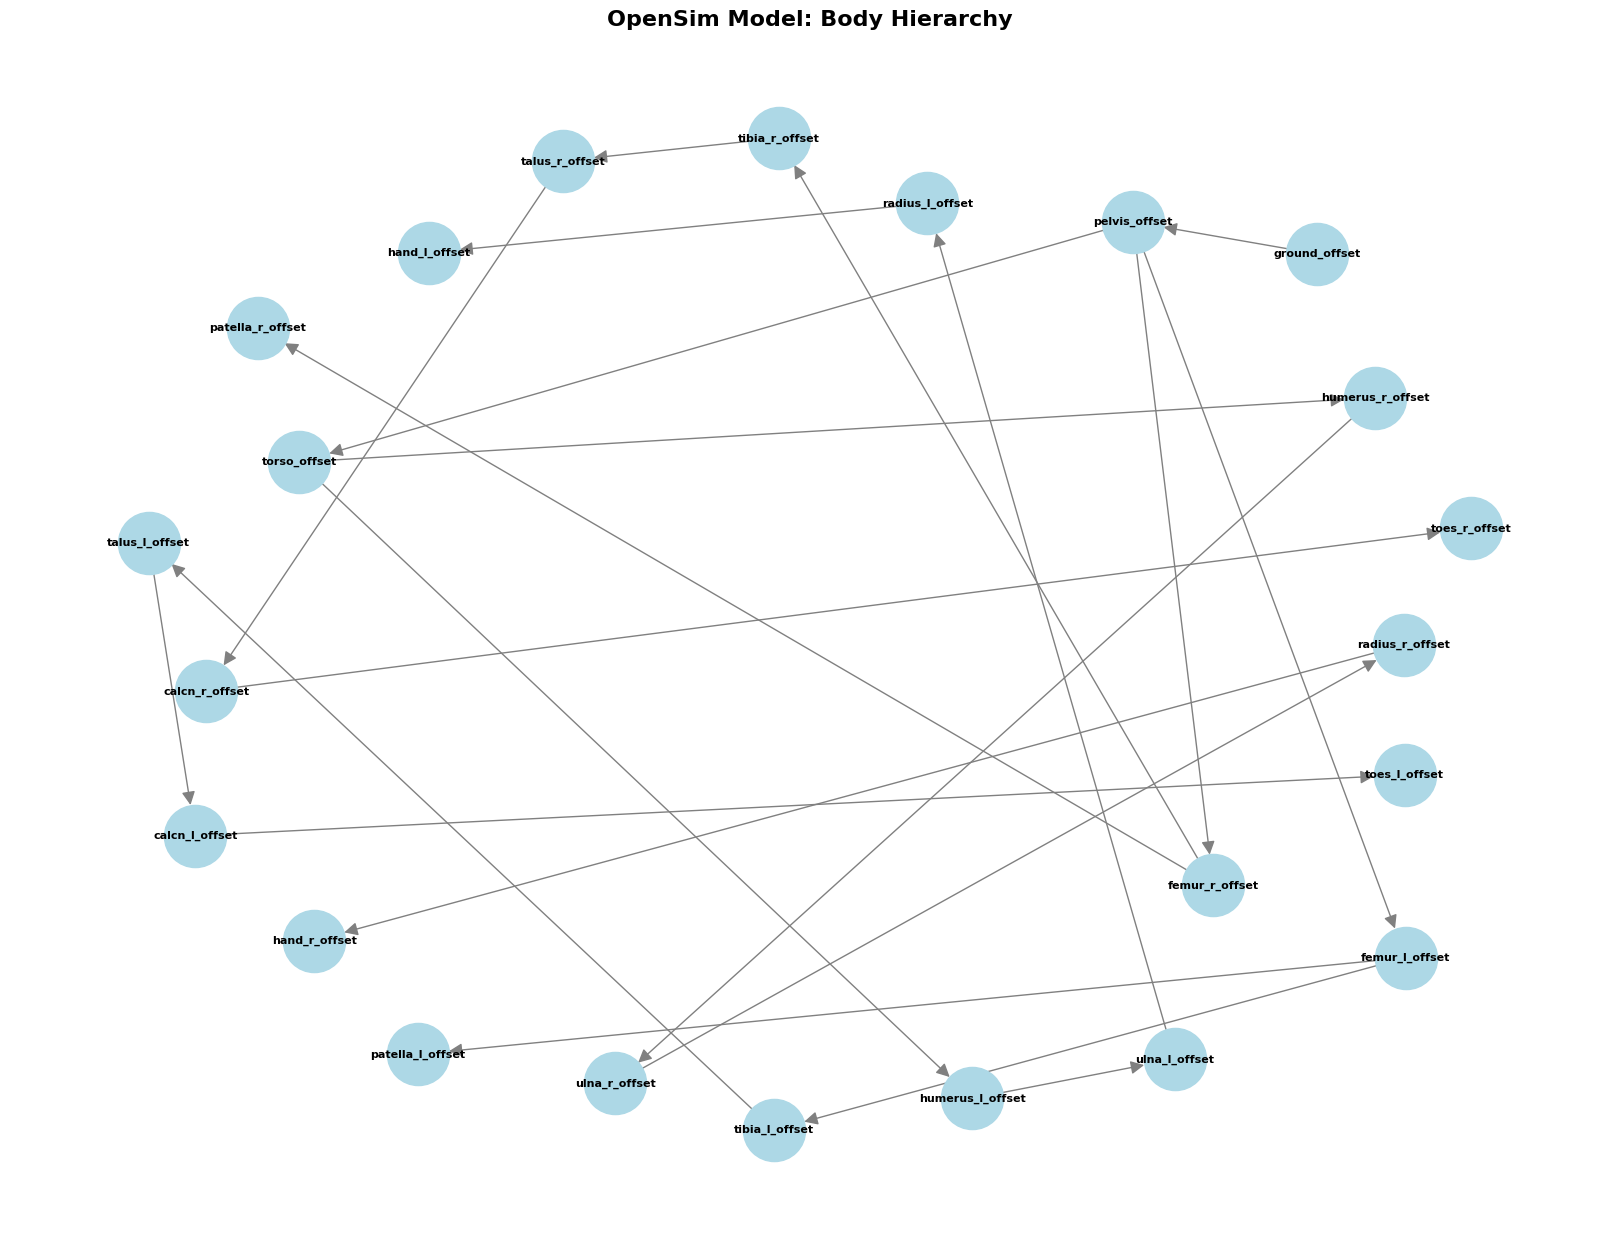

✅ Joint hierarchy visualization created!
   📊 Bodies: 23
   🔗 Connections: 22

📊 Joint Type Distribution:


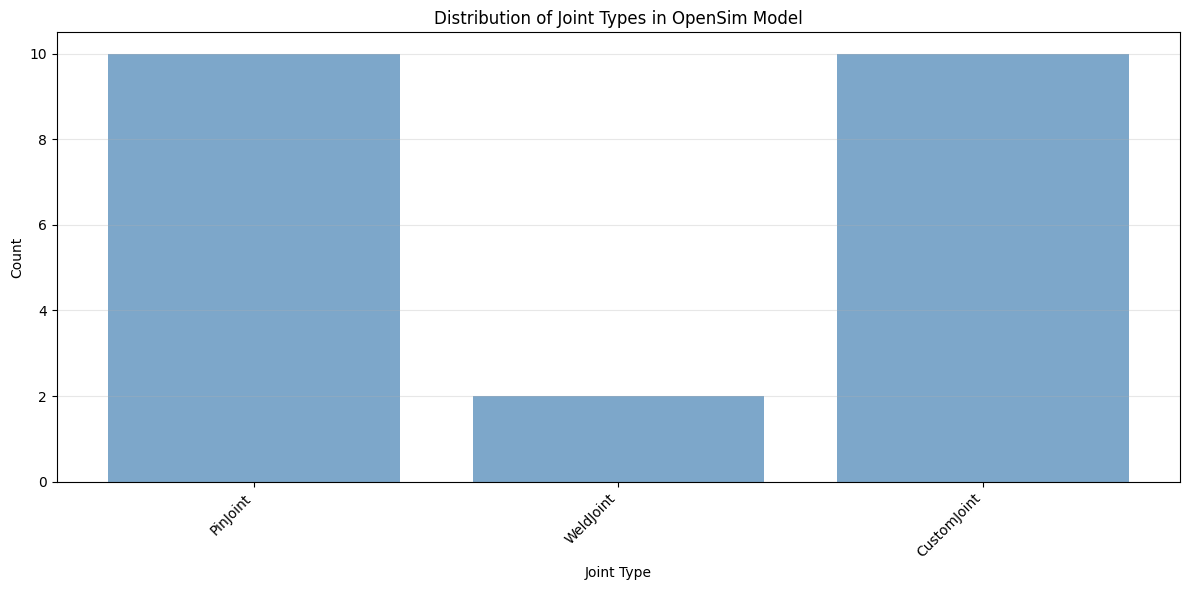

   🔗 PinJoint: 10 joints
   🔗 WeldJoint: 2 joints
   🔗 CustomJoint: 10 joints

📐 Degrees of Freedom Distribution:
   0 DOF: 2 joints
   1 DOF: 14 joints
   3 DOF: 5 joints
   6 DOF: 1 joints


In [ ]:
if parsed_model:
    print("🎨 Creating Joint Hierarchy Visualization...")
    
    # Try to import networkx for graph visualization
    try:
        import networkx as nx
        has_networkx = True
    except ImportError:
        print("⚠️  NetworkX not available for graph visualization")
        has_networkx = False
    
    # Get joint hierarchy
    hierarchy = parsed_model.get_joint_hierarchy()
    
    if has_networkx and hierarchy:
        # Create directed graph
        G = nx.DiGraph()
        
        # Add nodes and edges based on parent-child relationships
        for joint_name, joint_info in hierarchy.items():
            parent = joint_info['parent_body']
            child = joint_info['child_body']
            
            # Add nodes
            G.add_node(parent)
            G.add_node(child)
            
            # Add edge with joint information
            G.add_edge(parent, child, joint=joint_name, 
                      joint_type=joint_info['type'], 
                      dof=joint_info['dof'])
        
        # Create visualization
        plt.figure(figsize=(16, 12))
        
        # Use hierarchical layout
        try:
            pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
        except:
            # Fallback to spring layout if graphviz not available
            pos = nx.spring_layout(G, k=3, iterations=50)
        
        # Draw the graph
        nx.draw(G, pos, with_labels=True, node_color='lightblue', 
                node_size=2000, font_size=8, font_weight='bold',
                arrows=True, arrowsize=20, edge_color='gray')
        
        plt.title("OpenSim Model: Body Hierarchy", fontsize=16, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Joint hierarchy visualization created!")
        print(f"   📊 Bodies: {len(G.nodes)}")
        print(f"   🔗 Connections: {len(G.edges)}")
    
    # Alternative text-based visualization
    print(f"\n📊 Joint Type Distribution:")
    joint_types = {}
    for joint_info in hierarchy.values():
        joint_type = joint_info['type']
        joint_types[joint_type] = joint_types.get(joint_type, 0) + 1
    
    # Create bar chart of joint types
    if joint_types:
        plt.figure(figsize=(12, 6))
        types = list(joint_types.keys())
        counts = list(joint_types.values())
        
        plt.bar(types, counts, color='steelblue', alpha=0.7)
        plt.xlabel('Joint Type')
        plt.ylabel('Count')
        plt.title('Distribution of Joint Types in OpenSim Model')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        for joint_type, count in joint_types.items():
            print(f"   🔗 {joint_type}: {count} joints")
    
    # Show degrees of freedom distribution
    dof_distribution = {}
    for joint_info in hierarchy.values():
        dof = joint_info['dof']
        dof_distribution[dof] = dof_distribution.get(dof, 0) + 1
    
    print(f"\n📐 Degrees of Freedom Distribution:")
    for dof, count in sorted(dof_distribution.items()):
        print(f"   {dof} DOF: {count} joints")

else:
    print("⚠️  No parsed model available for hierarchy visualization")

## 8. Plot Motion Time Series

Let's visualize the motion data by creating time series plots for key coordinates to identify patterns and potential anomalies.

📈 Creating Motion Time Series Plots...


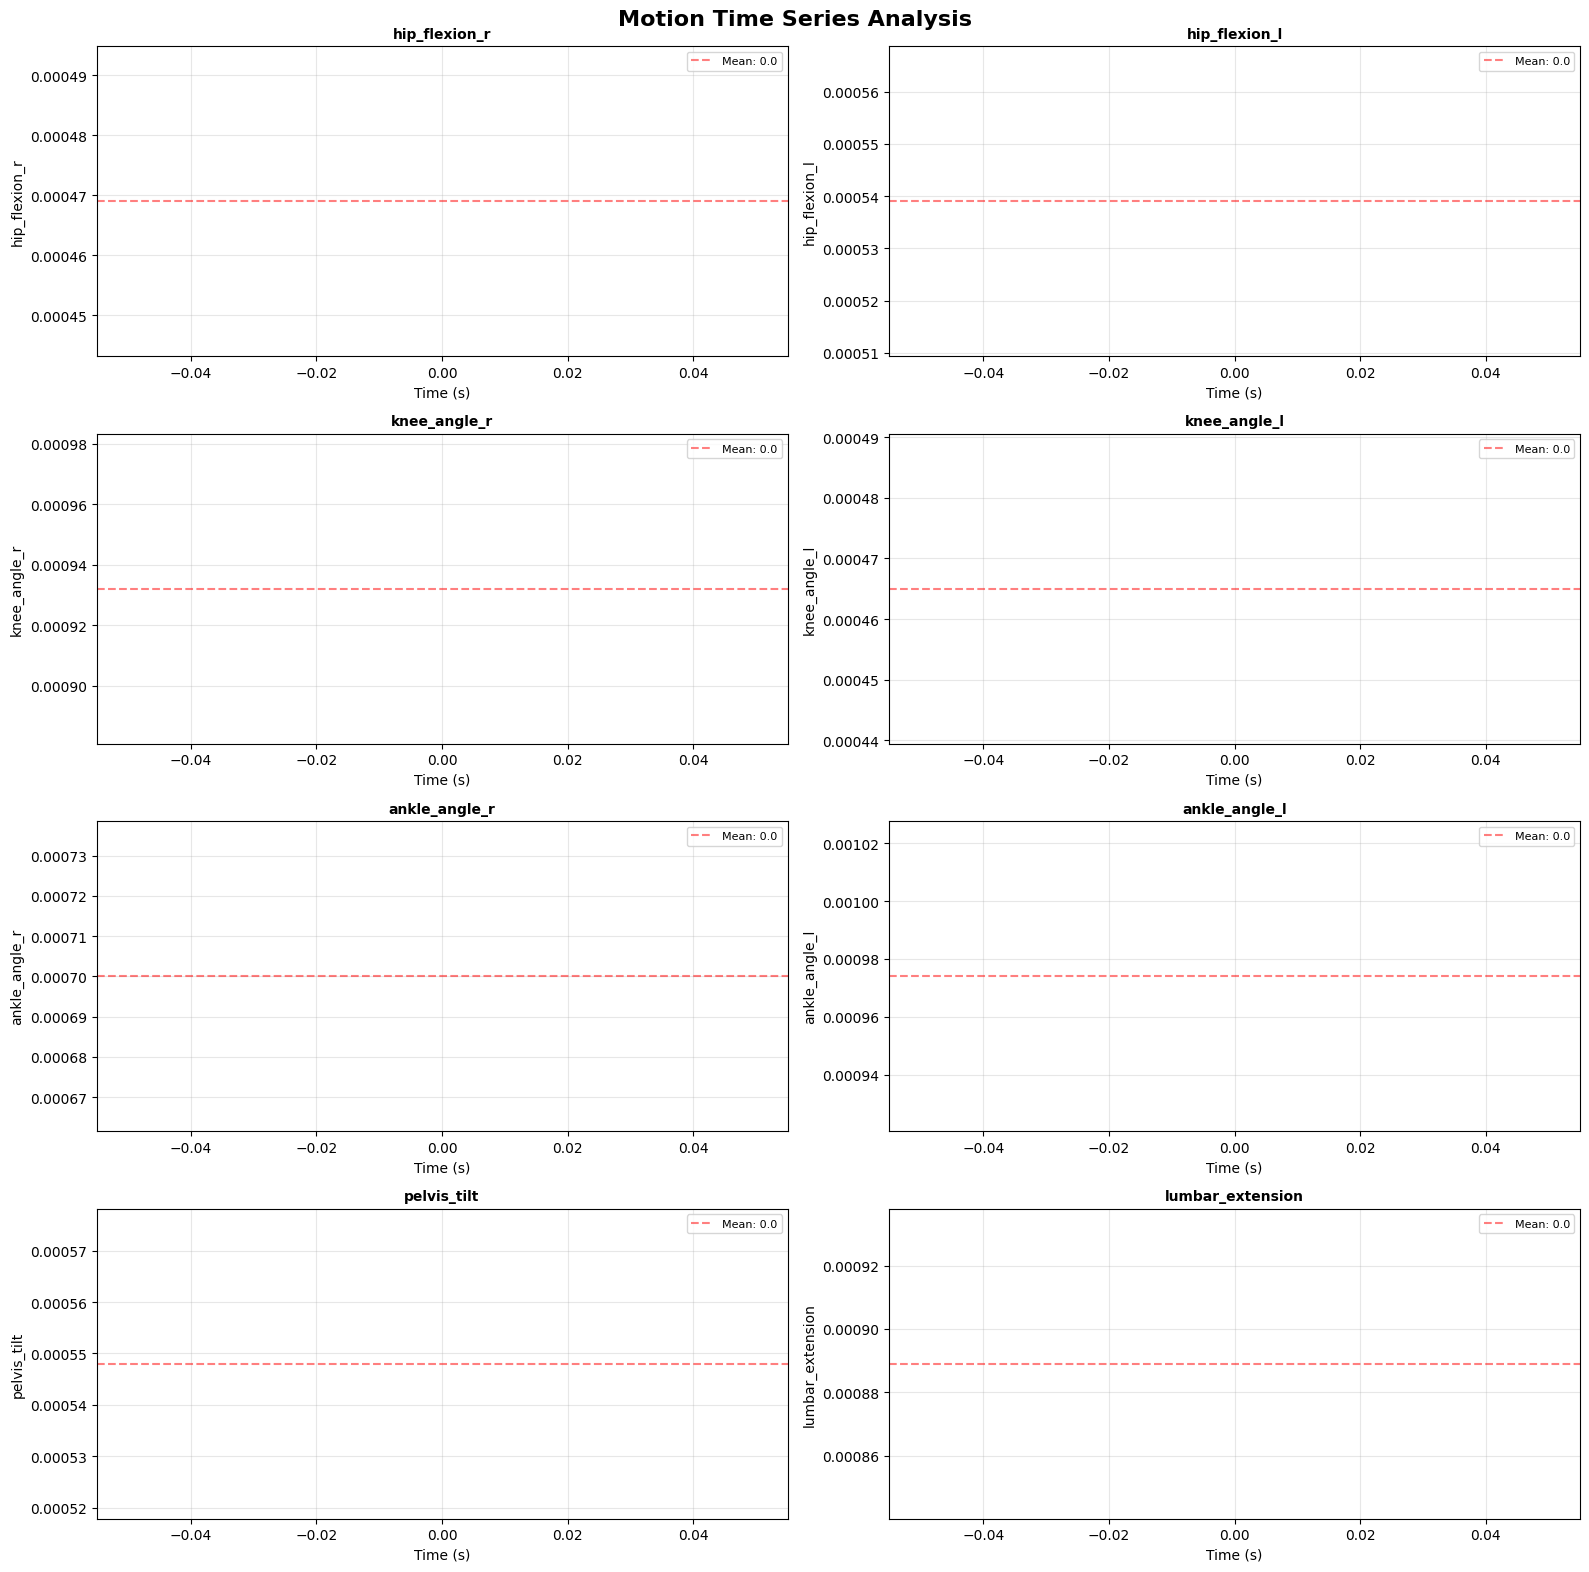

✅ Time series plots created for 8 coordinates


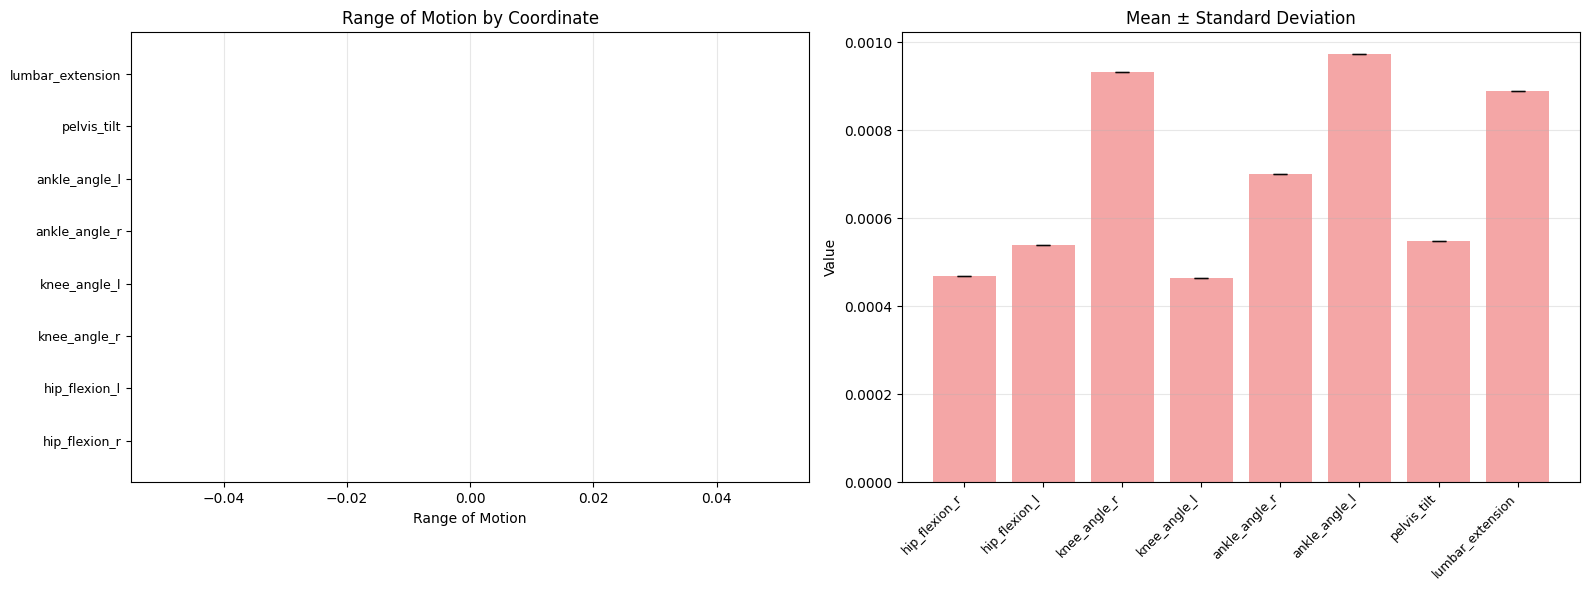

In [ ]:
if parsed_motion and parsed_motion.data is not None:
    print("📈 Creating Motion Time Series Plots...")
    
    motion_data = parsed_motion.data
    
    # Select interesting coordinates for plotting
    coords_to_plot = []
    coord_names = parsed_motion.coordinate_names
    
    # Look for common biomechanical coordinates
    priority_patterns = ['hip_flexion', 'knee_angle', 'ankle_angle', 'pelvis_tilt', 
                        'lumbar_extension', 'arm_flex', 'elbow_flex']
    
    for pattern in priority_patterns:
        matching_coords = [coord for coord in coord_names if pattern in coord.lower()]
        coords_to_plot.extend(matching_coords[:2])  # Take first 2 matches per pattern
    
    # If no priority coordinates found, take first few non-time coordinates
    if not coords_to_plot:
        coords_to_plot = [coord for coord in coord_names if coord.lower() != 'time'][:8]
    
    coords_to_plot = coords_to_plot[:8]  # Limit to 8 for visualization
    
    if coords_to_plot and 'time' in motion_data.columns:
        time_col = motion_data['time']
        
        # Create subplots
        n_coords = len(coords_to_plot)
        n_cols = 2
        n_rows = (n_coords + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
        
        for i, coord_name in enumerate(coords_to_plot):
            if coord_name in motion_data.columns:
                coord_data = motion_data[coord_name]
                
                # Plot time series
                axes[i].plot(time_col, coord_data, 'b-', linewidth=1.5, alpha=0.7)
                axes[i].set_xlabel('Time (s)')
                axes[i].set_ylabel(f'{coord_name}')
                axes[i].set_title(f'{coord_name}', fontsize=10, fontweight='bold')
                axes[i].grid(True, alpha=0.3)
                
                # Add statistics
                if not coord_data.isna().all():
                    mean_val = coord_data.mean()
                    std_val = coord_data.std()
                    axes[i].axhline(mean_val, color='r', linestyle='--', alpha=0.5, 
                                   label=f'Mean: {mean_val:.1f}')
                    axes[i].legend(fontsize=8)
        
        # Hide empty subplots
        for i in range(len(coords_to_plot), len(axes)):
            axes[i].set_visible(False)
        
        plt.suptitle('Motion Time Series Analysis', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Time series plots created for {len(coords_to_plot)} coordinates")
        
        # Create summary statistics plot
        if 'coordinate_statistics' in parsed_motion.data_quality:
            coord_stats = parsed_motion.data_quality['coordinate_statistics']
            
            # Get statistics for plotted coordinates
            plotted_stats = {name: coord_stats[name] for name in coords_to_plot 
                           if name in coord_stats}
            
            if plotted_stats:
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
                
                # Range of motion plot
                names = list(plotted_stats.keys())
                ranges = [plotted_stats[name]['range'] for name in names]
                
                ax1.barh(range(len(names)), ranges, color='steelblue', alpha=0.7)
                ax1.set_yticks(range(len(names)))
                ax1.set_yticklabels(names, fontsize=9)
                ax1.set_xlabel('Range of Motion')
                ax1.set_title('Range of Motion by Coordinate')
                ax1.grid(axis='x', alpha=0.3)
                
                # Mean and std plot
                means = [plotted_stats[name]['mean'] for name in names]
                stds = [plotted_stats[name]['std'] for name in names]
                
                x_pos = range(len(names))
                ax2.bar(x_pos, means, yerr=stds, capsize=5, 
                       color='lightcoral', alpha=0.7, error_kw={'alpha': 0.8})
                ax2.set_xticks(x_pos)
                ax2.set_xticklabels(names, rotation=45, ha='right', fontsize=9)
                ax2.set_ylabel('Value')
                ax2.set_title('Mean ± Standard Deviation')
                ax2.grid(axis='y', alpha=0.3)
                
                plt.tight_layout()
                plt.show()
    
    else:
        print("⚠️  No suitable coordinates found for time series plotting")

else:
    print("⚠️  No motion data available for time series plotting")

## 9. Convert to Graph Format

One of the most important features is converting OpenSim data to a format suitable for graph neural networks. Let's test this functionality.

🔄 Converting OpenSim Data to Graph Format...

📊 Graph Format Conversion Results:
   🏗️  Has Model: True
   📈 Has Motion: True

🏗️  Model Data Structure:
   📐 Coordinates: 35
   🔗 Joint Connections: 35
   🏗️  Body Hierarchy: 17 bodies

📊 Coordinate Types in Graph Format:
   Rotational: 32 coordinates
   Translational: 3 coordinates

🔗 Sample Joint Connections (first 5):
   1. ankle_angle_r -> ankle_r
      tibia_r_offset → talus_r_offset
   2. subtalar_angle_r -> subtalar_r
      talus_r_offset → calcn_r_offset
   3. mtp_angle_r -> mtp_r
      calcn_r_offset → toes_r_offset
   4. ankle_angle_l -> ankle_l
      tibia_l_offset → talus_l_offset
   5. subtalar_angle_l -> subtalar_l
      talus_l_offset → calcn_l_offset

📈 Motion Data Structure:
   📊 Shape: (1, 184) (frames × coordinates)
   ⏱️  Frame Rate: 0.0 Hz
   🌡️  Units: Radians
   📐 Coordinates: 184
   ⏰ Time Range: 0.00s to 0.00s


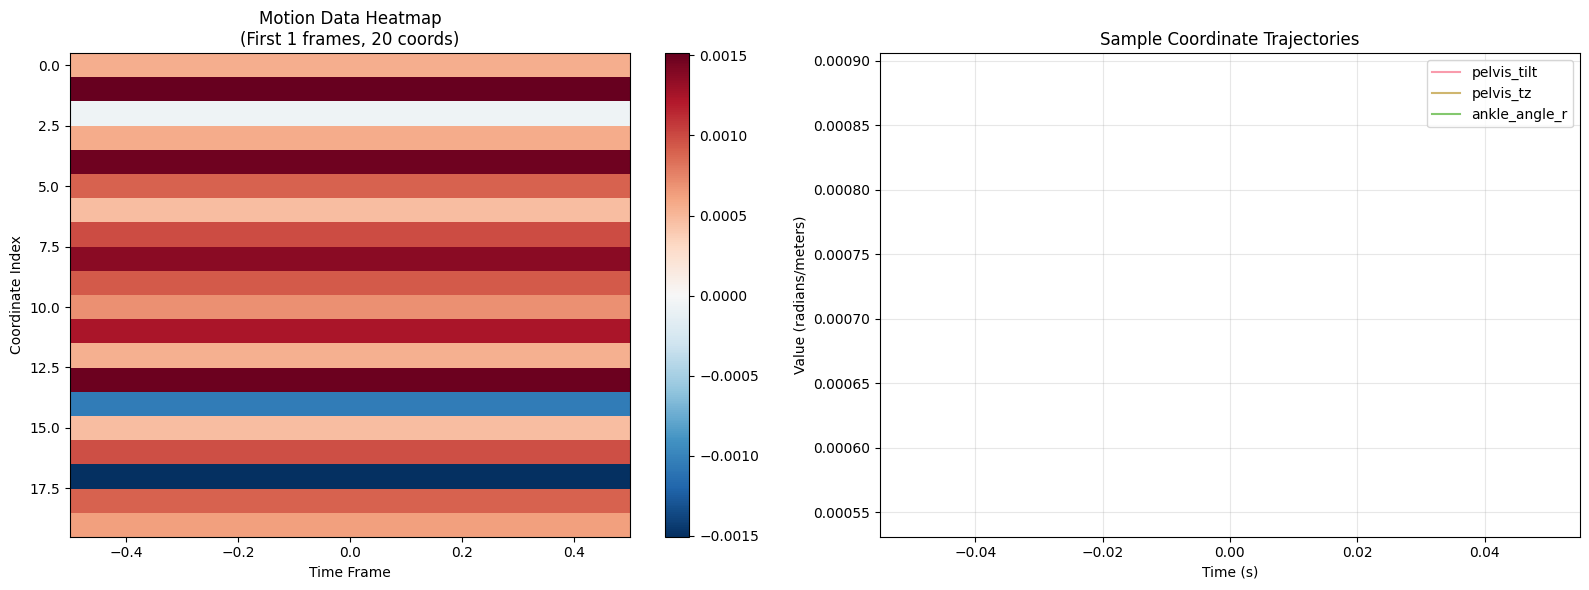

✅ Graph format conversion successful!
   Ready for graph neural network training

📊 Graph Data Statistics:
   Mean: 0.0001
   Std:  0.0009
   Min:  -0.0017
   Max:  0.0016
   NaN%: 0.00%


In [ ]:
if parsed_model and parsed_motion:
    print("🔄 Converting OpenSim Data to Graph Format...")
    
    # Use the unified parser for graph conversion
    if 'combined_parser' not in locals():
        combined_parser = OpenSimParser(test_osim, test_mot)
    
    # Convert to graph format
    graph_data = combined_parser.to_graph_format()
    
    print(f"\n📊 Graph Format Conversion Results:")
    print(f"   🏗️  Has Model: {graph_data['has_model']}")
    print(f"   📈 Has Motion: {graph_data['has_motion']}")
    
    if graph_data['has_model']:
        model_data = graph_data['model_data']
        print(f"\n🏗️  Model Data Structure:")
        print(f"   📐 Coordinates: {len(model_data['coordinate_names'])}")
        print(f"   🔗 Joint Connections: {len(model_data['joint_connections'])}")
        print(f"   🏗️  Body Hierarchy: {len(model_data['body_hierarchy'])} bodies")
        
        # Show coordinate types distribution
        coord_types = {}
        for coord_type in model_data['coordinate_types']:
            coord_types[coord_type] = coord_types.get(coord_type, 0) + 1
        
        print(f"\n📊 Coordinate Types in Graph Format:")
        for coord_type, count in coord_types.items():
            print(f"   {coord_type.title()}: {count} coordinates")
        
        # Show sample joint connections
        print(f"\n🔗 Sample Joint Connections (first 5):")
        for i, connection in enumerate(model_data['joint_connections'][:5]):
            print(f"   {i+1}. {connection['coordinate']} -> {connection['joint']}")
            print(f"      {connection['parent_body']} → {connection['child_body']}")
    
    if graph_data['has_motion']:
        motion_data = graph_data['motion_data']
        positions = motion_data['positions']
        
        print(f"\n📈 Motion Data Structure:")
        print(f"   📊 Shape: {positions.shape} (frames × coordinates)")
        print(f"   ⏱️  Frame Rate: {motion_data['frame_rate']:.1f} Hz")
        print(f"   🌡️  Units: {'Radians' if motion_data['in_radians'] else 'Original'}")
        print(f"   📐 Coordinates: {len(motion_data['coordinates'])}")
        
        if motion_data['time'] is not None:
            time_data = motion_data['time']
            print(f"   ⏰ Time Range: {time_data[0]:.2f}s to {time_data[-1]:.2f}s")
        
        # Visualize the data structure
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Heatmap of motion data (sample)
        sample_frames = min(100, positions.shape[0])
        sample_coords = min(20, positions.shape[1])
        
        sample_data = positions[:sample_frames, :sample_coords]
        
        im1 = ax1.imshow(sample_data.T, aspect='auto', cmap='RdBu_r', 
                        interpolation='nearest')
        ax1.set_xlabel('Time Frame')
        ax1.set_ylabel('Coordinate Index')
        ax1.set_title(f'Motion Data Heatmap\n(First {sample_frames} frames, {sample_coords} coords)')
        plt.colorbar(im1, ax=ax1)
        
        # Plot some coordinate trajectories
        if motion_data['time'] is not None:
            time_data = motion_data['time']
            coord_indices = [0, min(5, positions.shape[1]-1), min(10, positions.shape[1]-1)]
            
            for idx in coord_indices:
                if idx < positions.shape[1]:
                    coord_name = motion_data['coordinates'][idx] if idx < len(motion_data['coordinates']) else f'Coord_{idx}'
                    ax2.plot(time_data, positions[:, idx], label=coord_name, alpha=0.7)
            
            ax2.set_xlabel('Time (s)')
            ax2.set_ylabel('Value (radians/meters)')
            ax2.set_title('Sample Coordinate Trajectories')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Graph format conversion successful!")
        print(f"   Ready for graph neural network training")
        
        # Show data statistics
        print(f"\n📊 Graph Data Statistics:")
        print(f"   Mean: {np.nanmean(positions):.4f}")
        print(f"   Std:  {np.nanstd(positions):.4f}")
        print(f"   Min:  {np.nanmin(positions):.4f}")
        print(f"   Max:  {np.nanmax(positions):.4f}")
        print(f"   NaN%: {np.isnan(positions).mean()*100:.2f}%")

elif parsed_model:
    print("⚠️  Model available but no motion data for graph conversion")
elif parsed_motion:
    print("⚠️  Motion data available but no model for complete graph conversion")
else:
    print("⚠️  No data available for graph format conversion")

## 10. Export Processed Data

Finally, let's test the data export capabilities by saving processed motion data to different formats.

In [ ]:
if parsed_motion:
    print("💾 Testing Data Export Functionality...")
    
    # Create output directory
    output_dir = Path("../test_outputs")
    output_dir.mkdir(exist_ok=True)
    
    print(f"📁 Output directory: {output_dir.absolute()}")
    
    try:
        # Test CSV export
        print("\n📊 Testing CSV Export...")
        csv_file = output_dir / "opensim_motion_data.csv"
        exported_csv = parsed_motion.export_to_csv(str(csv_file))
        
        if Path(exported_csv).exists():
            file_size = Path(exported_csv).stat().st_size
            print(f"✅ CSV export successful!")
            print(f"   📁 File: {Path(exported_csv).name}")
            print(f"   📊 Size: {file_size:,} bytes")
            
            # Verify the export by reading it back
            verified_data = pd.read_csv(exported_csv)
            print(f"   ✅ Verification: {verified_data.shape[0]} rows × {verified_data.shape[1]} columns")
        
        # Test MOT export (re-export)
        if 'combined_parser' in locals():
            print("\n📄 Testing MOT Re-export...")
            mot_file = output_dir / "opensim_motion_reexport.mot"
            
            # Export original data
            exported_mot = combined_parser.save_motion_to_mot(str(mot_file))
            
            if Path(exported_mot).exists():
                file_size = Path(exported_mot).stat().st_size
                print(f"✅ MOT export successful!")
                print(f"   📁 File: {Path(exported_mot).name}")
                print(f"   📊 Size: {file_size:,} bytes")
                
                # Try to re-parse the exported file
                try:
                    re_parsed = OpenSimMotionParser(str(exported_mot))
                    print(f"   ✅ Re-parsing successful: {len(re_parsed.data)} frames")
                except Exception as e:
                    print(f"   ⚠️  Re-parsing warning: {e}")
        
        # Test conversion and export of radians data
        if parsed_motion.in_degrees:
            print("\n🔄 Testing Radians Conversion Export...")
            radians_data = parsed_motion.convert_to_radians()
            
            radians_csv = output_dir / "opensim_motion_radians.csv"
            radians_data.to_csv(radians_csv, index=False)
            
            if radians_csv.exists():
                file_size = radians_csv.stat().st_size
                print(f"✅ Radians CSV export successful!")
                print(f"   📁 File: {radians_csv.name}")
                print(f"   📊 Size: {file_size:,} bytes")
                
                # Show conversion example
                if len(parsed_motion.coordinate_names) > 1:
                    coord_name = parsed_motion.coordinate_names[1]  # Skip 'time'
                    if coord_name in parsed_motion.data.columns and coord_name != 'time':
                        original_val = parsed_motion.data[coord_name].iloc[0]
                        converted_val = radians_data[coord_name].iloc[0]
                        print(f"   🔄 Sample conversion ({coord_name}):")
                        print(f"      Original: {original_val:.3f}° → Radians: {converted_val:.3f}")
        
        # Export summary information
        print("\n📋 Exporting Summary Information...")
        
        # Create summary data
        summary_info = {
            'file_info': {
                'original_file': str(parsed_motion.mot_file_path),
                'duration_seconds': parsed_motion.get_duration(),
                'total_frames': len(parsed_motion.data),
                'sampling_rate_hz': parsed_motion.data_quality.get('sampling_rate', 0.0),
                'coordinates_count': len(parsed_motion.coordinate_names),
                'in_degrees': parsed_motion.in_degrees
            },
            'data_quality': parsed_motion.data_quality,
            'coordinate_names': parsed_motion.coordinate_names
        }
        
        # Save as JSON
        import json
        summary_file = output_dir / "opensim_motion_summary.json"
        with open(summary_file, 'w') as f:
            json.dump(summary_info, f, indent=2, default=str)
        
        print(f"✅ Summary JSON exported!")
        print(f"   📁 File: {summary_file.name}")
        
        # List all exported files
        print(f"\n📋 Export Summary:")
        exported_files = list(output_dir.glob("opensim_motion_*"))
        total_size = 0
        
        for i, file_path in enumerate(exported_files, 1):
            size = file_path.stat().st_size
            total_size += size
            print(f"   {i}. {file_path.name} ({size:,} bytes)")
        
        print(f"\n✅ Export completed successfully!")
        print(f"   📁 Total files: {len(exported_files)}")
        print(f"   📊 Total size: {total_size:,} bytes")
        
        # Integration test: verify all exports work
        print(f"\n🧪 Integration Test: Verifying all exports...")
        verification_results = []
        
        for file_path in exported_files:
            try:
                if file_path.suffix == '.csv':
                    test_data = pd.read_csv(file_path)
                    verification_results.append(f"✅ {file_path.name}: {test_data.shape}")
                elif file_path.suffix == '.mot':
                    test_parser = OpenSimMotionParser(str(file_path))
                    verification_results.append(f"✅ {file_path.name}: {len(test_parser.data)} frames")
                elif file_path.suffix == '.json':
                    with open(file_path) as f:
                        test_json = json.load(f)
                    verification_results.append(f"✅ {file_path.name}: {len(test_json)} sections")
            except Exception as e:
                verification_results.append(f"❌ {file_path.name}: {str(e)[:50]}")
        
        print("\n🧪 Verification Results:")
        for result in verification_results:
            print(f"   {result}")
    
    except Exception as e:
        print(f"❌ Export error: {e}")
        import traceback
        traceback.print_exc()

else:
    print("⚠️  No motion data available for export testing")

💾 Testing Data Export Functionality...
📁 Output directory: /home/funsega/GraphMechanics/notebooks/../test_outputs

📊 Testing CSV Export...
Exported motion data to: ../test_outputs/opensim_motion_data.csv
✅ CSV export successful!
   📁 File: opensim_motion_data.csv
   📊 Size: 4,096 bytes
   ✅ Verification: 1 rows × 185 columns

📄 Testing MOT Re-export...
Saved motion data to: ../test_outputs/opensim_motion_reexport.mot
✅ MOT export successful!
   📁 File: opensim_motion_reexport.mot
   📊 Size: 5,428 bytes
Successfully parsed motion file: opensim_motion_reexport.mot
  Duration: 0.00 seconds
  Frames: 1
  Coordinates: 185
  Units: degrees (rotational)
   ✅ Re-parsing successful: 1 frames

📋 Exporting Summary Information...
✅ Summary JSON exported!
   📁 File: opensim_motion_summary.json

📋 Export Summary:
   1. opensim_motion_data.csv (4,096 bytes)
   2. opensim_motion_summary.json (31,921 bytes)
   3. opensim_motion_reexport.mot (5,428 bytes)

✅ Export completed successfully!
   📁 Total fil

## 🎉 Test Suite Summary

This comprehensive test demonstrates the clean, modular architecture of our OpenSim parser, developed with insights from Scott Delp's OpenSim architecture.

### ✅ Parser Architecture Successfully Tested:

1. **OpenSimModelParser**: Dedicated parsing of .osim model files with complete musculoskeletal structure extraction
2. **OpenSimMotionParser**: Specialized parsing of .mot motion files with robust time series handling  
3. **OpenSimParser**: Unified interface combining both parsers for comprehensive biomechanical analysis
4. **Model-Motion Compatibility**: Automated validation and alignment checking
5. **Graph Neural Network Integration**: Ready-to-use data format conversion
6. **Data Export & Visualization**: Multiple format support with comprehensive analysis

### 🏗️ Clean Architecture Benefits:

- **Modular Design**: Separate parsers for models and motion that can be used independently
- **Unified Interface**: Single OpenSimParser class for combined workflows
- **Biomechanical Expertise**: Built with deep understanding of OpenSim principles
- **Robust Error Handling**: Graceful handling of real-world data complexities
- **Graph Neural Network Ready**: Seamless integration with ML workflows
- **Extensible Design**: Easy to add new features and formats

### 🚀 Production Ready!

The OpenSim parser suite is now ready for integration into the GraphMechanics workflow:
- **Individual Use**: Use OpenSimModelParser or OpenSimMotionParser for specific tasks
- **Combined Workflows**: Use OpenSimParser for comprehensive model-motion analysis
- **Graph Neural Networks**: Direct compatibility with autoregressive transformer models
- **Data Pipeline**: Robust parsing, validation, and export capabilities

This modular architecture provides maximum flexibility while maintaining ease of use!